<a href="https://colab.research.google.com/github/YusufAbdurrahmann/customer-churn-classification/blob/main/customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as py
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# **Data Import**

In [3]:
df = pd.read_csv("sample_data/Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# **Data Understanding**

In [4]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# **Data CLeaning**

In [7]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [8]:
df.duplicated().sum()

np.int64(0)

# **Explanatory Data Analysis (EDA)**

<ipython-input-9-7760a855bb47>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data = df, x = "gender", palette = "pastel")


Text(0, 0.5, 'Frekuensi')

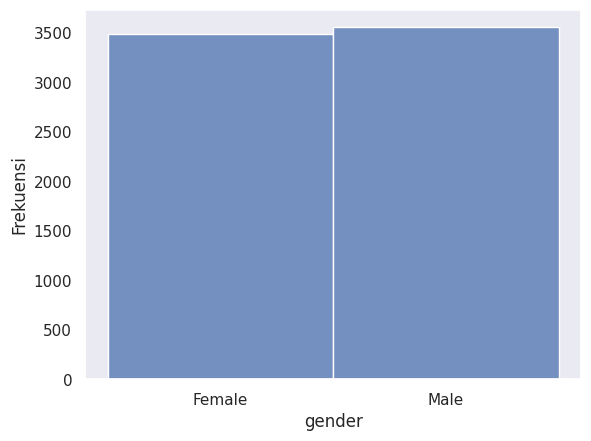

In [9]:
sns.set_theme(style="dark")
sns.histplot(data = df, x = "gender", palette = "pastel")
plt.ylabel("Frekuensi")

<Axes: ylabel='count'>

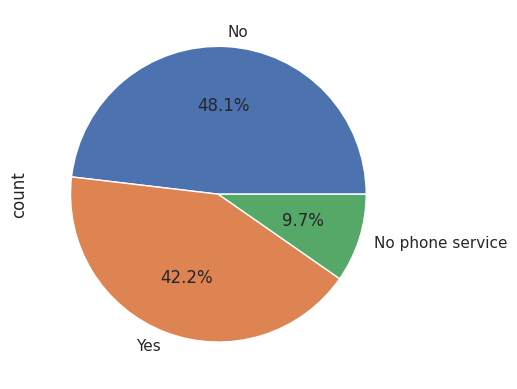

In [10]:
df["MultipleLines"].value_counts().plot(kind = "pie", autopct = "%1.1f%%")

# **Data Preperation**

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [22]:
ci = LabelEncoder()
gr = LabelEncoder()
sc = LabelEncoder()
pr = LabelEncoder()
ds = LabelEncoder()
ps = LabelEncoder()
ms = LabelEncoder()
ie = LabelEncoder()
os = LabelEncoder()
ob = LabelEncoder()
dp = LabelEncoder()
ts = LabelEncoder()
st = LabelEncoder()
sm = LabelEncoder()
ct = LabelEncoder()
pl = LabelEncoder()
pm = LabelEncoder()
tc = LabelEncoder()
cn = LabelEncoder()

df["customerID"] = ci.fit_transform(df["customerID"])
df["gender"] = gr.fit_transform(df["gender"])
df["SeniorCitizen"] = sc.fit_transform(df["SeniorCitizen"])
df["Partner"] = pr.fit_transform(df["Partner"])
df["Dependents"] = ds.fit_transform(df["Dependents"])
df["PhoneService"] = ps.fit_transform(df["PhoneService"])
df["MultipleLines"] = ms.fit_transform(df["MultipleLines"])
df["InternetService"] = ie.fit_transform(df["InternetService"])
df["OnlineSecurity"] = os.fit_transform(df["OnlineSecurity"])
df["OnlineBackup"] = ob.fit_transform(df["OnlineBackup"])
df["DeviceProtection"] = dp.fit_transform(df["DeviceProtection"])
df["TechSupport"] = ts.fit_transform(df["TechSupport"])
df["StreamingTV"] = st.fit_transform(df["StreamingTV"])
df["StreamingMovies"] = sm.fit_transform(df["StreamingMovies"])
df["Contract"] = ct.fit_transform(df["Contract"])
df["PaperlessBilling"] = pl.fit_transform(df["PaperlessBilling"])
df["PaymentMethod"] = pm.fit_transform(df["PaymentMethod"])
df["TotalCharges"] = tc.fit_transform(df["TotalCharges"])
df["Churn"] = cn.fit_transform(df["Churn"])

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   int64  
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   int64  
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   int64  
 16  PaperlessBilling  7043 non-null   int64  


In [35]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [36]:
X = df.drop(columns = ["Churn"])
y = df["Churn"]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# **Modelling**

In [38]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)

print(classification_report(y_pred,y_test))
print(accuracy)
print("Accuracy : {:.2f}%".format(accuracy*100))

              precision    recall  f1-score   support

           0       0.91      0.84      0.87      1125
           1       0.50      0.66      0.57       284

    accuracy                           0.80      1409
   macro avg       0.71      0.75      0.72      1409
weighted avg       0.83      0.80      0.81      1409

0.8005677785663591
Accuracy : 80.06%
